# Parsing water data for the Pemigewasset River
## Project description
The goal of this subproject is to predict when the high river levels make river crossings too difficult to continue your hike.  I'm going to start with the Liberty Spring Trail because I know that the river crossing that trail (which I'll assume is called the Liberty Spring) sometimes has a high enough flow to make crossing difficult. 

## Getting the data
USGS has data on certain rivers.  They measure three parameters: 
* Discharge in cubic feet per second
* Gage height in feet
* Precipitation in inches

The USGS doesn't measure these parameters for the Liberty Spring but they do measure them for the Pemigewasset River (which I'll refer to as the Pemi river), which the Liberty Spring is a tibutary to.  One of the Pemi measurements is made just downstream of where the Liberty Spring joins the Pemi, in Woodstock.  

I downloaded this data for the last year here: 
https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00045=on&cb_00060=on&cb_00065=on&format=gif_default&site_no=01075000&period=&begin_date=2017-05-01&end_date=2018-03-10

The next step is to import and parse this data and plot it. 

## Read in the data

In [1]:
import pandas as pd
wdf = pd.read_csv("..\\data\\raw\\usgs-pemi-flow.txt",sep='\t',comment='#')
wdf.head()

,agency_cd,site_no,datetime,tz_cd,65833_00060,65833_00060_cd,65834_00065,65834_00065_cd,65836_00045,65836_00045_cd
0,5s,15s,20d,6s,14n,10s,14n,10s,14n,10s
1,USGS,01075000,2017-03-10 00:00,EST,543,P,3.36,P,NaN,NaN
2,USGS,01075000,2017-03-10 00:15,EST,543,P,3.36,P,NaN,NaN
3,USGS,01075000,2017-03-10 00:30,EST,538,P,3.35,P,NaN,NaN
4,USGS,01075000,2017-03-10 00:45,EST,538,P,3.35,P,NaN,NaN


Let's delete the first row since that just describes the data format for each column. 

In [2]:
wdf = wdf.drop([0])
wdf.head()

,agency_cd,site_no,datetime,tz_cd,65833_00060,65833_00060_cd,65834_00065,65834_00065_cd,65836_00045,65836_00045_cd
1,USGS,01075000,2017-03-10 00:00,EST,543,P,3.36,P,NaN,NaN
2,USGS,01075000,2017-03-10 00:15,EST,543,P,3.36,P,NaN,NaN
3,USGS,01075000,2017-03-10 00:30,EST,538,P,3.35,P,NaN,NaN
4,USGS,01075000,2017-03-10 00:45,EST,538,P,3.35,P,NaN,NaN
5,USGS,01075000,2017-03-10 01:00,EST,538,P,3.35,P,NaN,NaN


Let's rename the columns to something more descriptive. 

In [3]:
wdf = wdf.rename(index=str, columns={"tz_cd": "timezone","65833_00060": "discharge", 
                                     "65833_00060_cd": "discharge_info",
                                    "65834_00065": "gage_height",
                                    "65834_00065_cd": "gage_height_info",
                                    "65836_00045": "precip",
                                    "65836_00045_cd": "precip_info",})
wdf = wdf.set_index('datetime')
wdf.head()

,agency_cd,site_no,timezone,discharge,discharge_info,gage_height,gage_height_info,precip,precip_info
datetime,,,,,,,,,
2017-03-10 00:00,USGS,01075000,EST,543,P,3.36,P,NaN,NaN
2017-03-10 00:15,USGS,01075000,EST,543,P,3.36,P,NaN,NaN
2017-03-10 00:30,USGS,01075000,EST,538,P,3.35,P,NaN,NaN
2017-03-10 00:45,USGS,01075000,EST,538,P,3.35,P,NaN,NaN
2017-03-10 01:00,USGS,01075000,EST,538,P,3.35,P,NaN,NaN


In [4]:
wdf.describe()

,agency_cd,site_no,timezone,discharge,discharge_info,gage_height,gage_height_info,precip,precip_info
count,34841,34841,34841,33992,33992,34828,34828,11088,11088
unique,1,1,2,1067,2,707,1,18,1
top,USGS,01075000,EDT,Ice,P,2.15,P,0.00,P
freq,34841,34841,22760,2802,32347,548,34828,10312,11088


# Info columns
The info coluns contain the data qualification codes.  These can be either:
* P: provisional data subject to revision
* e: Value has been estimated. 

The gage_height_info and precip_info columns contain only Ps.  
Let's check which values the discharge_info column contains. 

In [5]:
wdf.discharge_info.unique()

array(['P', 'P:e', nan], dtype=object)

In [6]:
wdf.gage_height_info.unique()

array(['P', nan], dtype=object)

In [7]:
wdf.precip_info.unique()

array([nan, 'P'], dtype=object)

# Plotting the data

In [8]:
# What are the data types for each column?
wdf.dtypes

agency_cd           object
site_no             object
timezone            object
discharge           object
discharge_info      object
gage_height         object
gage_height_info    object
precip              object
precip_info         object
dtype: object

In [9]:
# How many nans in each column?
wdf.isnull().sum()

agency_cd               0
site_no                 0
timezone                0
discharge             849
discharge_info        849
gage_height            13
gage_height_info       13
precip              23753
precip_info         23753
dtype: int64

In [10]:
# Add an ice column 
#wdf.loc[wdf['discharge'] == 'Ice']
import numpy as np
wdf['ice'] = np.where(wdf['discharge']=='Ice', 1,0)
wdf.head()

,agency_cd,site_no,timezone,discharge,discharge_info,gage_height,gage_height_info,precip,precip_info,ice
datetime,,,,,,,,,,
2017-03-10 00:00,USGS,01075000,EST,543,P,3.36,P,NaN,NaN,0
2017-03-10 00:15,USGS,01075000,EST,543,P,3.36,P,NaN,NaN,0
2017-03-10 00:30,USGS,01075000,EST,538,P,3.35,P,NaN,NaN,0
2017-03-10 00:45,USGS,01075000,EST,538,P,3.35,P,NaN,NaN,0
2017-03-10 01:00,USGS,01075000,EST,538,P,3.35,P,NaN,NaN,0


In [11]:
# Number of ice rows 
wdf.ice.sum()

2802

In [12]:
# Expected null columns
num_ice_cols = 2802 + 849
print(str(num_ice_cols))

3651


In [13]:
# Convert data in these columns from object to numeric data type
int_df = wdf
int_df.discharge = pd.to_numeric(wdf.discharge,errors='coerce')
int_df.gage_height = pd.to_numeric(wdf.gage_height,errors='coerce')
int_df.precip = pd.to_numeric(wdf.precip,errors='coerce')
int_df.head()

,agency_cd,site_no,timezone,discharge,discharge_info,gage_height,gage_height_info,precip,precip_info,ice
datetime,,,,,,,,,,
2017-03-10 00:00,USGS,01075000,EST,543.0,P,3.36,P,NaN,NaN,0
2017-03-10 00:15,USGS,01075000,EST,543.0,P,3.36,P,NaN,NaN,0
2017-03-10 00:30,USGS,01075000,EST,538.0,P,3.35,P,NaN,NaN,0
2017-03-10 00:45,USGS,01075000,EST,538.0,P,3.35,P,NaN,NaN,0
2017-03-10 01:00,USGS,01075000,EST,538.0,P,3.35,P,NaN,NaN,0


In [14]:
# How many nans in each column?
int_df.isnull().sum()

agency_cd               0
site_no                 0
timezone                0
discharge            3651
discharge_info        849
gage_height            13
gage_height_info       13
precip              23753
precip_info         23753
ice                     0
dtype: int64

In [15]:
# Interpolate the data to remove NaNs
int_df = int_df.interpolate()

In [16]:
# How many nans in each column?
int_df.isnull().sum()

agency_cd               0
site_no                 0
timezone                0
discharge               0
discharge_info        849
gage_height             0
gage_height_info       13
precip              23429
precip_info         23753
ice                     0
dtype: int64

In [17]:
# Normalize data to max value 
int_df['gage_height'] = int_df.gage_height/int_df['gage_height'].max()
int_df['discharge'] = int_df.discharge/int_df['discharge'].max()
int_df.head()

,agency_cd,site_no,timezone,discharge,discharge_info,gage_height,gage_height_info,precip,precip_info,ice
datetime,,,,,,,,,,
2017-03-10 00:00,USGS,01075000,EST,0.018345,P,0.248154,P,NaN,NaN,0
2017-03-10 00:15,USGS,01075000,EST,0.018345,P,0.248154,P,NaN,NaN,0
2017-03-10 00:30,USGS,01075000,EST,0.018176,P,0.247415,P,NaN,NaN,0
2017-03-10 00:45,USGS,01075000,EST,0.018176,P,0.247415,P,NaN,NaN,0
2017-03-10 01:00,USGS,01075000,EST,0.018176,P,0.247415,P,NaN,NaN,0


In [18]:
import matplotlib.pyplot as plt
plt.show()

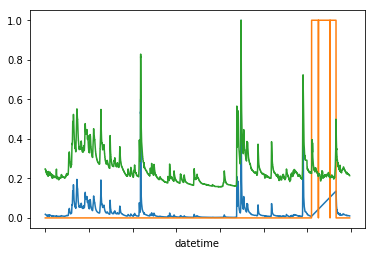

In [25]:
# Plot data 
import matplotlib
int_df.discharge.plot()
int_df.ice.plot()
int_df.gage_height.plot()

In [22]:
int_df.describe(include='all')

,agency_cd,site_no,timezone,discharge,discharge_info,gage_height,gage_height_info,precip,precip_info,ice
count,34841,34841,34841,34841.000000,33992,34841.000000,34828,11412.000000,11088,34841.000000
unique,1,1,2,NaN,2,NaN,1,NaN,1,NaN
top,USGS,01075000,EDT,NaN,P,NaN,P,NaN,P,NaN
freq,34841,34841,22760,NaN,32347,NaN,34828,NaN,11088,NaN
mean,NaN,NaN,NaN,0.028737,NaN,0.246114,NaN,0.001305,NaN,0.080422
std,NaN,NaN,NaN,0.046832,NaN,0.081334,NaN,0.007370,NaN,0.271950
min,NaN,NaN,NaN,0.002236,NaN,0.157312,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,0.007635,NaN,0.200886,NaN,0.000000,NaN,0.000000
50%,NaN,NaN,NaN,0.012399,NaN,0.220827,NaN,0.000000,NaN,0.000000
75%,NaN,NaN,NaN,0.031149,NaN,0.268095,NaN,0.000000,NaN,0.000000


## Conclusions
* Gage height may be a good predictor of crossing ease given that data is still available in winter 
* However, the presence of ice may be very informative since you can cross a frozen river 